## Packages

In [1]:
import numpy as np
import pandas as pd
from lstm_functions import *


from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, callbacks
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy import stats

## Reading the data

In [2]:
df = pd.read_csv('TDK_data2.csv')
df.index = pd.to_datetime(df['row.names.eurhuf.'])
df.head(10)

,Unnamed: 0,row.names.eurhuf.,EURHUF.X.Open,EURHUF.X.High,EURHUF.X.Low,EURHUF.X.Close,EURHUF.X.Volume,EURHUF.X.Adjusted,USDHUF.X.Open,USDHUF.X.High,USDHUF.X.Low,USDHUF.X.Close,USDHUF.X.Volume,USDHUF.X.Adjusted,kinfo_dummy,vm_dummy,nm_dummy,mgy_dummy,alapkamat
row.names.eurhuf.,,,,,,,,,,,,,,,,,,,
2018-05-31,1,2018-05-31,319.394989,320.140991,319.062012,319.403992,0,319.403992,273.160004,275.339996,272.660004,273.425995,0,273.425995,0,0,0,0,0
2018-06-03,2,2018-06-03,319.765991,320.066010,318.451996,319.765991,0,319.765991,274.170013,274.239014,271.230011,274.149994,0,274.149994,0,0,0,0,0
2018-06-04,3,2018-06-04,318.503998,318.946014,318.128998,318.490997,0,318.490997,272.437012,273.454010,271.709992,272.459992,0,272.459992,0,0,0,0,0
2018-06-05,4,2018-06-05,318.691010,319.067993,317.989014,318.665008,0,318.665008,271.554993,272.079987,269.869995,271.640015,0,271.640015,0,0,0,0,0
2018-06-06,5,2018-06-06,317.806000,318.454987,316.627014,317.931000,0,317.931000,269.729004,269.729004,267.660004,269.812988,0,269.812988,0,0,0,0,0
2018-06-07,6,2018-06-07,318.371002,320.480988,318.173004,318.367004,0,318.367004,270.109985,273.122009,269.438995,270.049988,0,270.049988,0,0,0,0,0
2018-06-10,7,2018-06-10,319.347992,321.665985,319.251007,319.411987,0,319.411987,271.130005,273.123993,270.149994,271.269989,0,271.269989,0,0,0,0,0
2018-06-11,8,2018-06-11,320.652008,321.769012,319.191986,320.971985,0,320.971985,272.609985,273.328003,270.660004,272.500000,0,272.500000,0,0,0,0,0
2018-06-12,9,2018-06-12,319.571991,320.850006,319.138000,319.473999,0,319.473999,271.940002,272.937012,271.566986,271.981995,0,271.981995,0,0,0,0,0


## Lag 1

In [3]:
mse_lag_1 = sim_lstm_custom_lag(df = df, y_name = 'EURHUF.X.Open', dummy_names = ['kinfo_dummy', 'vm_dummy', 'mgy_dummy', 'nm_dummy', 'alapkamat'], lag =  1, n_sim= 20)
np.mean(mse_lag_1)

E:\Downloads\TDK_24H2\lstm_functions.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  windowed_df = df_to_windowed_df(df[y_name], df['row.names.eurhuf.'][lag], '2024-09-14', lag)


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 125435.7031 - mean_absolute_error: 353.1221 - val_loss: 144054.9219 - val_mean_absolute_error: 379.5111
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 123302.9141 - mean_absolute_error: 350.1092 - val_loss: 138057.2031 - val_mean_absolute_error: 371.5252
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 117766.4453 - mean_absolute_error: 342.0927 - val_loss: 127784.7578 - val_mean_absolute_error: 357.4333
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 105937.9219 - mean_absolute_error: 324.3369 - val_loss: 111249.3750 - val_mean_absolute_error: 333.5014
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 89741.2109 - mean_absolute_error: 298.2387 - val_loss: 88144.7344 - val_mean_absolute_error: 296.8477
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 68135.0938 - mean_absolute_error: 259.3246 - val_loss: 61092.5078 - val_mean_absolute_error: 247.1160
Epoch 7/100
41/41 ━━━━━━━

36.680106372737725

## Lag 2

In [4]:
mse_lag_2 = sim_lstm_custom_lag(df = df, y_name = 'EURHUF.X.Open', dummy_names = ['kinfo_dummy', 'vm_dummy', 'mgy_dummy', 'nm_dummy', 'alapkamat'], lag =  2, n_sim= 20)
np.mean(mse_lag_2)

E:\Downloads\TDK_24H2\lstm_functions.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  windowed_df = df_to_windowed_df(df[y_name], df['row.names.eurhuf.'][lag], '2024-09-14', lag)


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 125461.9219 - mean_absolute_error: 353.2066 - val_loss: 143692.1875 - val_mean_absolute_error: 379.0336
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 123200.3984 - mean_absolute_error: 349.9422 - val_loss: 133443.5781 - val_mean_absolute_error: 365.2642
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 112513.9609 - mean_absolute_error: 334.2065 - val_loss: 114484.4141 - val_mean_absolute_error: 338.3174
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 91247.4609 - mean_absolute_error: 300.7739 - val_loss: 86912.9844 - val_mean_absolute_error: 294.7665
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 65504.7969 - mean_absolute_error: 254.1871 - val_loss: 54738.9570 - val_mean_absolute_error: 233.9086
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36706.5352 - mean_absolute_error: 189.0731 - val_loss: 26406.3809 - val_mean_absolute_error: 162.4213
Epoch 7/100
41/41 ━━━━━━━━━

7.643115493342809

## Lag 3

In [5]:
mse_lag_3 = sim_lstm_custom_lag(df = df, y_name = 'EURHUF.X.Open', dummy_names = ['kinfo_dummy', 'vm_dummy', 'mgy_dummy', 'nm_dummy', 'alapkamat'], lag =  3, n_sim= 20)
np.mean(mse_lag_3)

E:\Downloads\TDK_24H2\lstm_functions.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  windowed_df = df_to_windowed_df(df[y_name], df['row.names.eurhuf.'][lag], '2024-09-14', lag)


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 126106.3203 - mean_absolute_error: 354.1223 - val_loss: 141325.9219 - val_mean_absolute_error: 375.8992
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 120311.2500 - mean_absolute_error: 345.7670 - val_loss: 126649.8672 - val_mean_absolute_error: 355.8429
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 104017.4141 - mean_absolute_error: 321.3544 - val_loss: 104192.7891 - val_mean_absolute_error: 322.7493
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82216.3125 - mean_absolute_error: 285.2639 - val_loss: 75485.7969 - val_mean_absolute_error: 274.7000
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55127.5938 - mean_absolute_error: 232.8058 - val_loss: 44519.0078 - val_mean_absolute_error: 210.9343
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28086.8164 - mean_absolute_error: 164.6858 - val_loss: 18811.7754 - val_mean_absolute_error: 137.0623
Epoch 7/100
41/41 ━━━━━━━━━

5.959627209294262

## Lag 4

In [6]:
mse_lag_4 = sim_lstm_custom_lag(df = df, y_name = 'EURHUF.X.Open', dummy_names = ['kinfo_dummy', 'vm_dummy', 'mgy_dummy', 'nm_dummy', 'alapkamat'], lag =  4, n_sim= 20)
np.mean(mse_lag_4)

E:\Downloads\TDK_24H2\lstm_functions.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  windowed_df = df_to_windowed_df(df[y_name], df['row.names.eurhuf.'][lag], '2024-09-14', lag)


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 127352.8203 - mean_absolute_error: 355.7993 - val_loss: 144998.3594 - val_mean_absolute_error: 380.7527
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 125275.6250 - mean_absolute_error: 352.8707 - val_loss: 142354.5156 - val_mean_absolute_error: 377.2649
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 121901.4375 - mean_absolute_error: 348.1173 - val_loss: 137350.6094 - val_mean_absolute_error: 370.5737
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 117418.1484 - mean_absolute_error: 341.5825 - val_loss: 128672.1094 - val_mean_absolute_error: 358.6731
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 108170.7188 - mean_absolute_error: 327.7536 - val_loss: 115432.7344 - val_mean_absolute_error: 339.7161
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 94938.6406 - mean_absolute_error: 306.9154 - val_loss: 97636.2656 - val_mean_absolute_error: 312.4269
Epoch 7/100
41/41 ━━━━━

5.750950345707848

## Lag 5

In [7]:
mse_lag_5 = sim_lstm_custom_lag(df = df, y_name = 'EURHUF.X.Open', dummy_names = ['kinfo_dummy', 'vm_dummy', 'mgy_dummy', 'nm_dummy', 'alapkamat'], lag =  5, n_sim= 20)
np.mean(mse_lag_5)

E:\Downloads\TDK_24H2\lstm_functions.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  windowed_df = df_to_windowed_df(df[y_name], df['row.names.eurhuf.'][lag], '2024-09-14', lag)


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 125543.7969 - mean_absolute_error: 353.3183 - val_loss: 143448.8125 - val_mean_absolute_error: 378.7124
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 123516.7656 - mean_absolute_error: 350.3518 - val_loss: 134033.4062 - val_mean_absolute_error: 366.0706
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 112812.2812 - mean_absolute_error: 334.7562 - val_loss: 118238.6797 - val_mean_absolute_error: 343.8211
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 95828.4375 - mean_absolute_error: 308.3198 - val_loss: 93719.8516 - val_mean_absolute_error: 306.0950
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 71035.1953 - mean_absolute_error: 264.9910 - val_loss: 62147.9375 - val_mean_absolute_error: 249.2433
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 42380.0898 - mean_absolute_error: 203.3263 - val_loss: 28582.9883 - val_mean_absolute_error: 168.9890
Epoch 7/100
41/41 ━━━━━━━━━

7.699691403374916

## Lag 6

In [8]:
mse_lag_6 = sim_lstm_custom_lag(df = df, y_name = 'EURHUF.X.Open', dummy_names = ['kinfo_dummy', 'vm_dummy', 'mgy_dummy', 'nm_dummy', 'alapkamat'], lag =  6, n_sim= 20)
np.mean(mse_lag_6)

E:\Downloads\TDK_24H2\lstm_functions.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  windowed_df = df_to_windowed_df(df[y_name], df['row.names.eurhuf.'][lag], '2024-09-14', lag)


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 126424.6484 - mean_absolute_error: 354.5665 - val_loss: 144518.7188 - val_mean_absolute_error: 380.1223
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 124122.5469 - mean_absolute_error: 351.2241 - val_loss: 137055.7656 - val_mean_absolute_error: 370.1757
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 116238.1172 - mean_absolute_error: 339.8183 - val_loss: 123561.5156 - val_mean_absolute_error: 351.4766
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 101913.5703 - mean_absolute_error: 318.0363 - val_loss: 103582.6953 - val_mean_absolute_error: 321.8027
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 82630.3906 - mean_absolute_error: 285.9961 - val_loss: 78033.9297 - val_mean_absolute_error: 279.2995
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 57945.9102 - mean_absolute_error: 238.9608 - val_loss: 50684.7773 - val_mean_absolute_error: 225.0757
Epoch 7/100
41/41 ━━━━━━━

4.1247021213085

## Lag 7

In [9]:
mse_lag_7 = sim_lstm_custom_lag(df = df, y_name = 'EURHUF.X.Open', dummy_names = ['kinfo_dummy', 'vm_dummy', 'mgy_dummy', 'nm_dummy', 'alapkamat'], lag =  7, n_sim= 20)
np.mean(mse_lag_7)

E:\Downloads\TDK_24H2\lstm_functions.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  windowed_df = df_to_windowed_df(df[y_name], df['row.names.eurhuf.'][lag], '2024-09-14', lag)


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 127176.6641 - mean_absolute_error: 355.5423 - val_loss: 143757.0000 - val_mean_absolute_error: 379.1198
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 123837.5391 - mean_absolute_error: 350.8762 - val_loss: 136543.2500 - val_mean_absolute_error: 369.4835
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 115911.2344 - mean_absolute_error: 339.3499 - val_loss: 123768.5859 - val_mean_absolute_error: 351.7718
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 103077.0547 - mean_absolute_error: 319.8002 - val_loss: 105561.5703 - val_mean_absolute_error: 324.8636
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 84877.2266 - mean_absolute_error: 289.8891 - val_loss: 82675.6172 - val_mean_absolute_error: 287.4898
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 63523.1641 - mean_absolute_error: 250.3162 - val_loss: 57671.3242 - val_mean_absolute_error: 240.0961
Epoch 7/100
41/41 ━━━━━━━

13.387251452143548

## Lag 8

In [10]:
mse_lag_8 = sim_lstm_custom_lag(df = df, y_name = 'EURHUF.X.Open', dummy_names = ['kinfo_dummy', 'vm_dummy', 'mgy_dummy', 'nm_dummy', 'alapkamat'], lag =  8, n_sim= 20)
np.mean(mse_lag_8)

E:\Downloads\TDK_24H2\lstm_functions.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  windowed_df = df_to_windowed_df(df[y_name], df['row.names.eurhuf.'][lag], '2024-09-14', lag)


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 126022.8594 - mean_absolute_error: 353.9862 - val_loss: 143611.1250 - val_mean_absolute_error: 378.9274
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 122263.1719 - mean_absolute_error: 348.6245 - val_loss: 136126.1406 - val_mean_absolute_error: 368.9186
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 115430.5625 - mean_absolute_error: 338.6535 - val_loss: 123957.5547 - val_mean_absolute_error: 352.0403
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 102241.7891 - mean_absolute_error: 318.5746 - val_loss: 106687.1016 - val_mean_absolute_error: 326.5913
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 86180.0625 - mean_absolute_error: 292.2160 - val_loss: 84666.2266 - val_mean_absolute_error: 290.9313
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 65124.6289 - mean_absolute_error: 253.6021 - val_loss: 60187.2773 - val_mean_absolute_error: 245.2796
Epoch 7/100
41/41 ━━━━━━━

11.732523977413248

## Lineplot of the lags

In [14]:
lags = pd.DataFrame(
    {'rmse':[np.mean(mse_lag_1), np.mean(mse_lag_2), np.mean(mse_lag_3), np.mean(mse_lag_4), np.mean(mse_lag_5), np.mean(mse_lag_6),np.mean(mse_lag_7), np.mean(mse_lag_8)]},
    index = (x for x in range(1,9,1))
)


<Axes: >

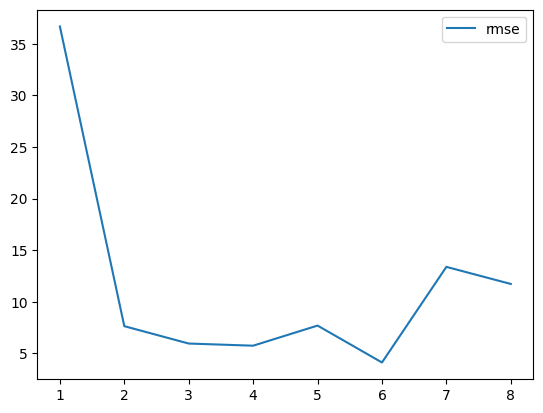

In [15]:
lags.plot()

In [16]:
lags.to_excel("optimal_lag_mean.xlsx", index = False)